# Liberies:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from numpy.random import randint
from numpy.random import rand
from scipy import stats

## My solution

In [8]:
import goodness_of_fit

# Data

In [4]:
df_facebook = pd.read_excel('facebook_degrees0.xlsx')
df_facebook = df_facebook.dropna()
df_houses = pd.read_csv('house_price.csv')
df_profit = pd.read_csv('CompanyABCProfit.csv')

In [5]:
not_normal_addition = pd.Series(5*[-1000])
new_profit = df_profit['Profit'].append(not_normal_addition)

# Expirements

## Facebook

In [6]:
data = df_facebook['degree unique'].sort_values(ascending=True).reset_index(drop=True)
degree_data = df_facebook['p(k)'].sort_values(ascending=False).reset_index(drop=True)

### Suggested Approach

>0, new best f() = 0.165186
>0, new best f() = 0.161568
>0, new best f() = 0.141820
>0, new best f() = 0.130178
>1, new best f() = 0.130062
>3, new best f() = 0.129860
>4, new best f() = 0.129613
>5, new best f() = 0.129567
>6, new best f() = 0.123797
>6, new best f() = 0.085642
Done!
f() = 0.085642
alpha estimate is 1.2856641100766775
length of p_pl found is 24
length original found is 57


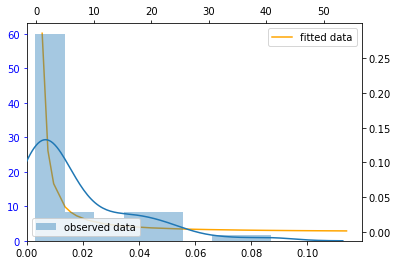

KS results are ks_test : 0.0921955433740298 and p_value : 0.9752424425910408


In [21]:
best = goodness_of_fit.find_empirical_dist('pl', data, emprical_dist=degree_data)

Done!
f() = 1.000000
lamnda estimate is 0.03567787971457696
length of p_exp found is 35
length original found is 57


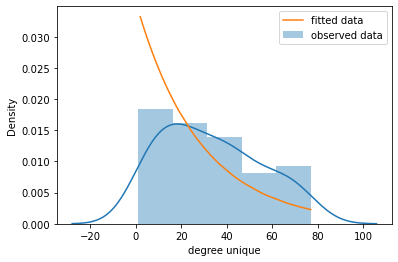

KS results are ks_test : 0.12048349266901881 and p_value : 0.6459616798896164


In [20]:
best = goodness_of_fit.find_empirical_dist('exp', data, emprical_dist=degree_data)

>0, new best f() = 0.090909
>1, new best f() = 0.085714
>2, new best f() = 0.083333
>4, new best f() = 0.081081
>8, new best f() = 0.078947
>67, new best f() = 0.076923
>70, new best f() = 0.075000
>96, new best f() = 0.073171
Done!
f() = 0.073171
mu estimate is 22.463414634146343 and sigma estimate is 13.807204837093002
length of p_normal found is 41
length original found is 57


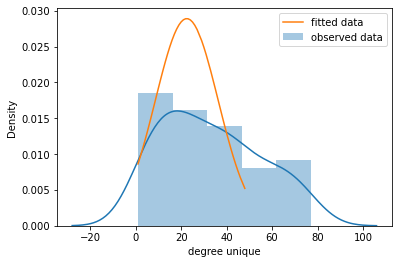

KS results are ks_test : 0.08927107113256794 and p_value : 0.870676328741548


In [19]:
best = goodness_of_fit.find_empirical_dist('normal', data, emprical_dist=degree_data)

### Existed

#### power_law

In [38]:
result_alpha = estimate_alpha(x=data,x_min=data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.powerlaw.cdf,args=(result_alpha,0))
print(f'No GA results: alpha is {result_alpha}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: alpha is 1.258797664213564; KS is 0.08446618924922433; p_value is 0.7792142848201293


#### normal

In [37]:
result_mu, result_sigma = stats._continuous_distns.norm.fit(data)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(data,stats._continuous_distns.norm.cdf,args=(result_mu,result_sigma))
print(f'No GA results: mu is {result_mu}; Sigma is {result_sigma}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: mu is 33.0; Sigma is 21.48030513684407; KS is 0.08388274445300248; p_value is 0.7861472740938166


#### exp

In [36]:
result_lambda = 1/(data.mean()-data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.expon.cdf,args=(0,1/result_lambda))
print(f'No GA results: Lambda is {result_lambda}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: Lambda is 0.03125; KS is 0.9692332344763441; p_value is 1.3234117160201349e-86


## Sales price

In [9]:
data = df_houses['SalePrice'][:250].sort_values(ascending=True).reset_index(drop=True)

### Suggested Approach

>1, new best f() = 0.120968
>1, new best f() = 0.120482
>2, new best f() = 0.116935
>4, new best f() = 0.113821
>6, new best f() = 0.111111
>7, new best f() = 0.110656
>8, new best f() = 0.107438
>8, new best f() = 0.103306
>9, new best f() = 0.102881
>11, new best f() = 0.101695
>11, new best f() = 0.100000
>12, new best f() = 0.097458
>13, new best f() = 0.089362
>16, new best f() = 0.086207
>19, new best f() = 0.083333
>29, new best f() = 0.080000
>31, new best f() = 0.079295
>46, new best f() = 0.075893
>56, new best f() = 0.072398
>80, new best f() = 0.068807
>81, new best f() = 0.068493
>82, new best f() = 0.064516
>83, new best f() = 0.064220
>84, new best f() = 0.059908
>87, new best f() = 0.055814
>88, new best f() = 0.055556
>93, new best f() = 0.051163
>94, new best f() = 0.050926
Done!
f() = 0.050926
mu estimate is 182798.3148148148 and sigma estimate is 67509.84613978585
length of p_normal found is 216
length original found is 250


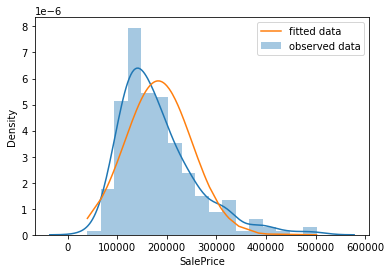

KS results are ks_test : 0.0528227071962941 and p_value : 0.5648181734516995


[40000,
 68500,
 79000,
 79000,
 82000,
 83000,
 84500,
 85000,
 87000,
 89500,
 91000,
 94500,
 94750,
 97000,
 98000,
 100000,
 100000,
 100000,
 101000,
 104000,
 105000,
 106000,
 107000,
 107400,
 109900,
 110000,
 110000,
 110000,
 110000,
 110500,
 112000,
 112000,
 113000,
 114500,
 114500,
 115000,
 115000,
 115000,
 118000,
 118964,
 120000,
 124900,
 125000,
 125000,
 126500,
 127000,
 127000,
 127000,
 127500,
 128200,
 128950,
 129500,
 129900,
 129900,
 130000,
 133900,
 134800,
 135750,
 136500,
 139000,
 139400,
 140000,
 140000,
 140000,
 140000,
 140000,
 141000,
 141000,
 143000,
 143900,
 144000,
 144000,
 145000,
 148000,
 148500,
 149000,
 149000,
 150000,
 153000,
 153337,
 153500,
 153900,
 155000,
 155000,
 156000,
 157000,
 158000,
 159000,
 160000,
 161750,
 162500,
 163000,
 163500,
 163990,
 164500,
 165500,
 166000,
 168500,
 169500,
 170000,
 171000,
 172500,
 173000,
 174000,
 174000,
 176000,
 177000,
 177000,
 178000,
 179900,
 180000,
 180500,
 180500

In [84]:
goodness_of_fit.find_empirical_dist('normal', data, emprical_dist=data)

>1, new best f() = 0.071696
>1, new best f() = 0.071084
>2, new best f() = 0.069505
>4, new best f() = 0.068409
>5, new best f() = 0.066505
>5, new best f() = 0.066286
>6, new best f() = 0.063179
>8, new best f() = 0.062548
>8, new best f() = 0.060909
>9, new best f() = 0.060796
>9, new best f() = 0.059315
>9, new best f() = 0.058765
>9, new best f() = 0.058264
>10, new best f() = 0.055745
>11, new best f() = 0.054294
>12, new best f() = 0.052608
>12, new best f() = 0.051789
>13, new best f() = 0.050516
>13, new best f() = 0.049265
>14, new best f() = 0.047011
>15, new best f() = 0.045969
>16, new best f() = 0.044618
>17, new best f() = 0.044560
>18, new best f() = 0.044231
>18, new best f() = 0.042776
>23, new best f() = 0.041498
>23, new best f() = 0.041005
>24, new best f() = 0.040035
>25, new best f() = 0.037884
>27, new best f() = 0.037852
>27, new best f() = 0.036427
>32, new best f() = 0.036262
>40, new best f() = 0.035995
>42, new best f() = 0.035174
>47, new best f() = 0.03442

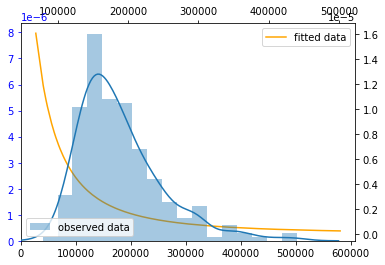

KS results are ks_test : 0.2668786320415132 and p_value : 3.0012887332402716e-12


In [9]:
best = goodness_of_fit.find_empirical_dist('pl', data, emprical_dist=data)

Done!
f() = 1.000000
lamnda estimate is 9.924149371916535e-06
length of p_exp found is 112
length original found is 250


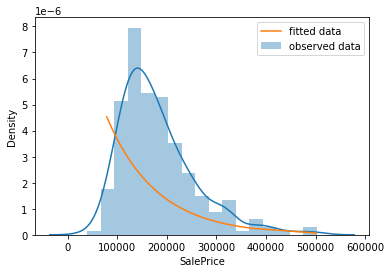

KS results are ks_test : 0.5757481321458248 and p_value : 1.0440822002564366e-35


In [32]:
best = goodness_of_fit.find_empirical_dist('exp', data, emprical_dist=data)

### Existed 

#### power_law

In [56]:
result_alpha = estimate_alpha(x=data,x_min=data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.powerlaw.cdf,args=(result_alpha,0))
print(f'No GA results: alpha is {result_alpha}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: alpha is 1.6974709932142864; KS is 0.19241733178315662; p_value is 1.3955758611627873e-08


#### normal

In [40]:
result_mu, result_sigma = stats._continuous_distns.norm.fit(data)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(data,stats._continuous_distns.norm.cdf,args=(result_mu,result_sigma))
print(f'No GA results: mu is {result_mu}; Sigma is {result_sigma}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: mu is 181451.52; Sigma is 76050.9237682331; KS is 0.12015413896870475; p_value is 0.0013298857985101814


#### exp

In [41]:
result_lambda = 1/(data.mean()-data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.expon.cdf,args=(0,1/result_lambda))
print(f'No GA results: Lambda is {result_lambda}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: Lambda is 7.069559945343819e-06; KS is 0.9999929304650439; p_value is 0.0


## Profit

In [58]:
data = new_profit.sort_values(ascending=True).reset_index(drop=True)

### Suggested Approach

#### normal

>0, new best f() = 0.069307
>0, new best f() = 0.063492
>0, new best f() = 0.054348
>1, new best f() = 0.044944
>2, new best f() = 0.044444
>3, new best f() = 0.043956
>6, new best f() = 0.043478
>11, new best f() = 0.043011
Done!
f() = 0.043011
mu estimate is 998.2903225806451 and sigma estimate is 465.400061009953
length of p_normal found is 93
length original found is 205


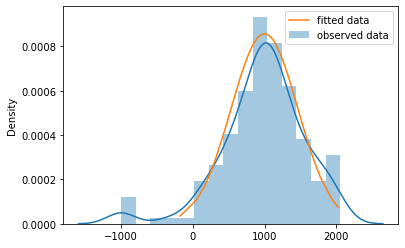

KS results are ks_test : 0.04736831251938661 and p_value : 0.9788230915103506


In [26]:
best = goodness_of_fit.find_empirical_dist('normal', data)

#### power-law

>0, new best f() = 0.139710
>0, new best f() = 0.120316
>0, new best f() = 0.106301
>0, new best f() = 0.092074
>0, new best f() = 0.090268
>1, new best f() = 0.087875
>1, new best f() = 0.087464
>1, new best f() = 0.075056
>2, new best f() = 0.068628
>3, new best f() = 0.068258
>5, new best f() = 0.066990
>7, new best f() = 0.066087
>12, new best f() = 0.065862
>13, new best f() = 0.063987
>16, new best f() = 0.063914
>16, new best f() = 0.062934
>17, new best f() = 0.061377
>18, new best f() = 0.060846
>18, new best f() = 0.059601
>30, new best f() = 0.055905
>31, new best f() = 0.050249
Done!
f() = 0.050249
alpha estimate is -4.2289231649018015
length of p_pl found is 95
length original found is 205


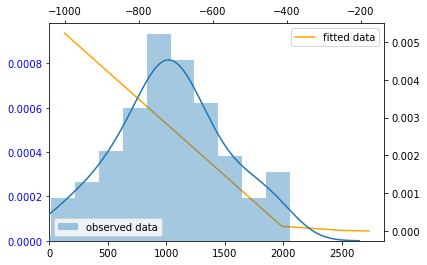

KS results are ks_test : nan and p_value : nan


In [59]:
best = goodness_of_fit.find_empirical_dist('pl', data, data)

#### exp

Done!
f() = 1.000000
lamnda estimate is 0.0004931406683756542
length of p_exp found is 116
length original found is 205


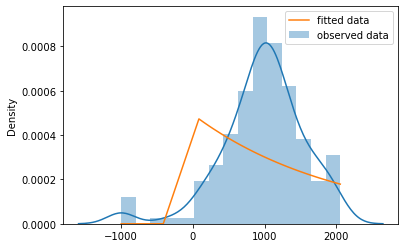

KS results are ks_test : 0.36900943238466477 and p_value : 1.1217425465539946e-14


In [45]:
best = goodness_of_fit.find_empirical_dist('exp', data)

### Existed

#### normal

In [46]:
result_mu, result_sigma = stats._continuous_distns.norm.fit(data)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(data,stats._continuous_distns.norm.cdf,args=(result_mu,result_sigma))
print(f'No GA results: mu is {result_mu}; Sigma is {result_sigma}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: mu is 972.6731707317073; Sigma is 573.0775502045801; KS is 0.07651009090492211; p_value is 0.1721962222916712


#### exp

In [47]:
result_lambda = 1/(data.mean()-data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.expon.cdf,args=(0,1/result_lambda))
print(f'No GA results: Lambda is {result_lambda}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: Lambda is 0.0005069263448385007; KS is 0.9994932021206127; p_value is 0.0


#### power-law

In [52]:
result_alpha = estimate_alpha(x=data,x_min=data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.powerlaw.cdf,args=(result_alpha,0))
print(f'No GA results: alpha is {result_alpha}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: alpha is -8.0551786723665; KS is nan; p_value is nan
